# Customer Churn Prediction

## Overview
Customer churn means when a customer leaves a company or stops using its services.  
Our goal is to build a Machine Learning model that can predict whether a customer will **churn (Yes)** or **stay (No)**.

We'll use the **Telco Customer Churn dataset**, which includes customer demographics, account information, and service usage.

---

### Cover:
1. Import Libraries and Load Data  
2. Explore and Understand the Data (EDA)  
3. Clean and Preprocess Data  
4. Encode Categorical Variables  
5. Train a Classification Model (Logistic Regression)  
6. Evaluate Model Performance  
7. Visualize Results and Conclusions

- - -


## Import Libraries and Load Dataset

We'll start by importing the essential Python libraries for data analysis and machine learning,  
and then load our dataset (`telco_customer_churn.csv`) to inspect the first few rows.

In [3]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pre-processing and Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pd.set_option('display.max_columns',None)

data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv.xls')

print("data Shape:", data.shape)
data.head()




data Shape: (7043, 21)


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

- - -


##  Explore and Understand the Data {EDA}

Before training a model, let's explore our dataset:
- Check for missing values  
- Look at data types  
- View summary statistics  
- Understand target variable distribution (`Churn`)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
# View basic statistics
data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

count = 7043 → No missing values in these columns.

SeniorCitizen mean ≈ 0.16 → ~16% of customers are seniors.
tenure mean ≈ 32.37 → Average customer has been with the company ~32 months.
MonthlyCharges mean ≈ 64.76 → Average monthly charge is ~$64.76

tenure std ≈ 24.56 → Some customers have very short tenure, some very long.
MonthlyCharges std ≈ 30.09 → Monthly charges vary a lot.

Target Variable Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


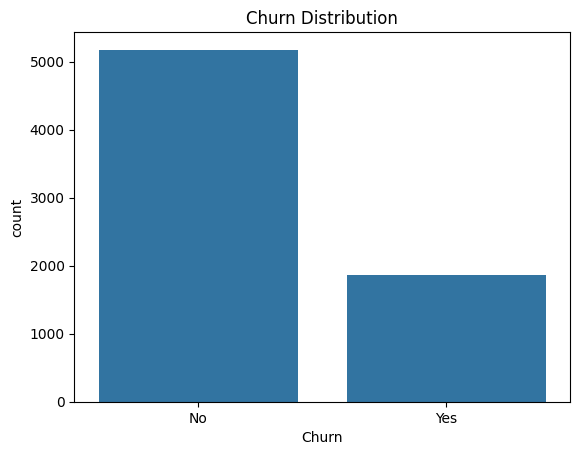

In [10]:
# Check class distribution
print("Target Variable Distribution:")
print(data['Churn'].value_counts())
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.show()

- - -

## Clean & Prepare Data

We need to:
1. Convert `TotalCharges` from object to numeric  
2. Drop `customerID` (not a predictive feature)  
3. Encode all categorical variables into numeric & Verify data types before encoding

In [11]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [12]:
print(data['TotalCharges'].isnull().sum())

11


In [15]:
median_total = data['TotalCharges'].median()
print(median_total)
data['TotalCharges'].fillna(median_total, inplace=True)

1397.475


/var/folders/f3/ny_qtwdj1cb_cdrm5xqb0w3h0000gn/T/ipykernel_48149/3988789447.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(median_total, inplace=True)


In [16]:
print(data['TotalCharges'].isnull().sum())

0


In [17]:
data.drop('customerID', axis=1, inplace=True)

In [18]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

- - -

## Encoding Categorical Variables

Machine learning models need numeric inputs. We'll:
1. Encode all categorical features (object type columns) into numbers  
2. Encode the target variable `Churn` (Yes → 1, No → 0)